## Predicting Precipitation Hardening using Shercliff-Ashby Model

Method roughly following the methodology in:
    
https://www.sciencedirect.com/science/article/pii/095671519090291N

# Preamble

In [1]:
from IPython.display import display
from ipywidgets import *
import numpy as np
from bqplot import *
#from bqplot import pyplot as plt
import matplotlib.pyplot as plt
from traitlets import link
from scipy.optimize import fsolve

Here we assume that the precipitate volume fraction obeys,

$f = f_0\left(1-\exp\left({-t/\tau}\right)\right)$

with $f_0$ being the equilibrium fraction of precipitates and $\tau$ is the time constant for precipitation.  

A mass balance between solute in solid solution and in precipitates gives,

$\frac{f}{f_0} = \frac{c_i - \bar{c}\left(t\right)}{c_i-c_0}$

where $c_i$ is the total amount of solue in solid solution, $c_0$ is the equilibrium solute in solid solution when $f= f_0$.  $\bar{c}$ is the average solute composition in the matrix as a function of time.  Coupling this to the equation for the evolution of precipiate volume fraction (above) allows one to track $\bar{c}$ as a function of time.

Finally, precipitate growth is assumed to obey simple coarsening kinetics with,

$r^3 - r_0^3 = Kt$

with $r_0$ being an initial precipitate radius and K being a kinetic coefficient.



# Typical Parameters:

In [2]:
ci = 0.05
c0 = 0.03
f0 = 0.005
tau = 5000.
k = 1.e-4
r0 = 0.1

# Calculate $f$, $\bar{c}$ and $r$ as a function of time 

In [3]:
# setup time using a logarithmic scale
t10 = np.linspace(1,6,1000)
t = 10**t10

#Calculate f, bar(c) and r as a function of time
f = f0*(1.-np.exp(-t/tau))
barc = ci-(ci-c0)*f/f0
r = (r0**3+k*t)**(0.3333)
L = (4*3.14/(3.*f))**(1./3.)*r

# Plot Precipitate Volume Fraction, Radius and Spacing

Text(0,0.5,'Solute in Solid Solution (at fraction)')

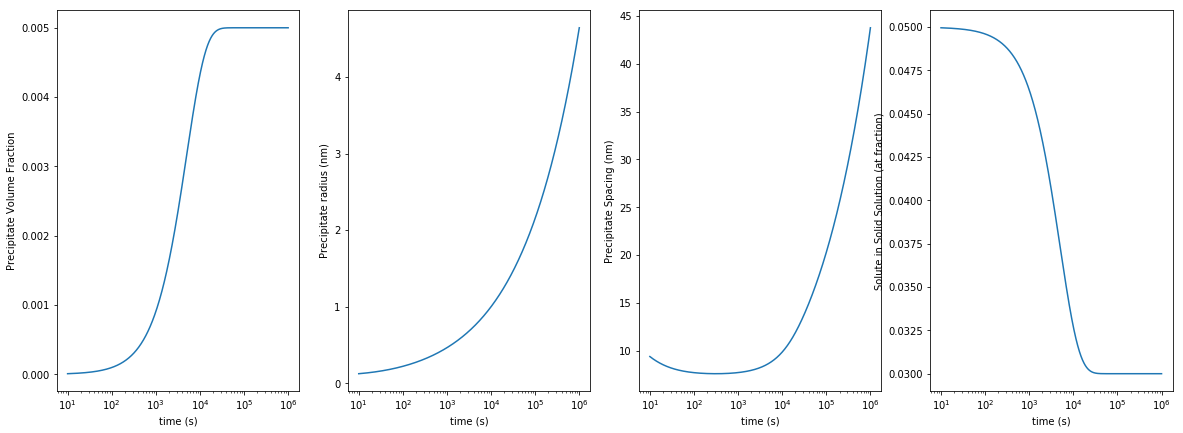

In [4]:
plt.figure(figsize=(20,7))
plt.subplot(1, 4, 1)
plt.semilogx(t,f)
plt.xlabel('time (s)')
plt.ylabel('Precipitate Volume Fraction')

plt.subplot(1, 4, 2)
plt.semilogx(t,r)
plt.xlabel('time (s)')
plt.ylabel('Precipitate radius (nm)')

plt.subplot(1, 4, 3)
plt.semilogx(t,L)
plt.xlabel('time (s)')
plt.ylabel('Precipitate Spacing (nm)')

plt.subplot(1, 4, 4)
plt.semilogx(t,barc)
plt.xlabel('time (s)')
plt.ylabel('Solute in Solid Solution (at fraction)')

# Calculate Strengthening

Parameters:

In [5]:
sigma0 = 20.
Kss = 250.
G = 25.e3
b = 0.2
rc = 2.

In [6]:
sigmass = Kss*barc**0.5

sigmappt= []
for i in range(len(r)):
    if r[i]<rc:
        sigmappt.append(2.*G*b*(3./4./np.pi)**(1./3.)*f[i]**(1./3.)/rc)
    else:
        sigmappt.append(2.*G*b*(3./4./np.pi)**(1./3.)*f[i]**(1./3.)/r[i])
        

sigma = sigma0+sigmass+sigmappt

# Plot Strengthening

Text(0,0.5,'Solid Solution Strength (MPa)')

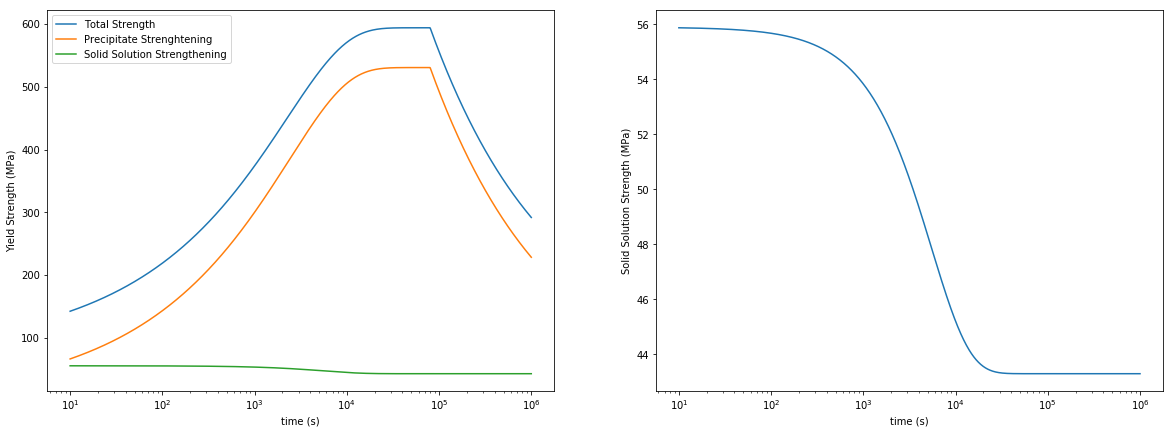

In [7]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
plt.semilogx(t,sigma,label='Total Strength')
plt.semilogx(t,sigmappt,label='Precipitate Strenghtening')
plt.semilogx(t,sigmass,label='Solid Solution Strengthening')
plt.xlabel('time (s)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(t,sigmass)
plt.xlabel('time (s)')
plt.ylabel('Solid Solution Strength (MPa)')

